# PyCaret 2 Regression Example
This notebook is created using PyCaret 2.0. Last updated : 31-07-2020

In [1]:
# check version
from pycaret.utils import version
version()

2.0


# 1. Loading Dataset

In [2]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 2. Initialize Setup

In [3]:
from pycaret.regression import *
reg1 = setup(data, target = 'charges', session_id=123, log_experiment=True, experiment_name='insurance1')

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1338, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


2020/07/31 08:44:23 WARNING mlflow.tracking.context.git_context: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: No module named 'repository'


# 3. Compare Baseline

In [4]:
best_model = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Extreme Gradient Boosting,2666.8675,22721899.5305,4764.4228,0.8410,0.4428,0.3151,0.0429
1,Gradient Boosting Regressor,2671.5927,23019681.2661,4794.6037,0.8393,0.4439,0.3143,0.0683
2,CatBoost Regressor,2814.6048,24757340.4659,4973.7765,0.8265,0.4734,0.3427,1.1286
3,Random Forest,2779.2026,25351757.1506,5032.2587,0.8218,0.4816,0.3432,0.2087
4,Light Gradient Boosting Machine,3018.9895,25515012.3051,5049.8492,0.8192,0.5534,0.3876,0.0815
5,Extra Trees Regressor,2755.9265,28180447.2658,5299.6566,0.8043,0.4875,0.3255,0.1496
6,AdaBoost Regressor,4366.1001,29298215.0087,5411.0606,0.7915,0.6478,0.7662,0.0195
7,Ridge Regression,4339.6093,38542499.6202,6196.4891,0.7343,0.6348,0.4429,0.0036
8,Bayesian Ridge,4343.5006,38542310.2536,6196.4607,0.7343,0.6405,0.4436,0.0058
9,Linear Regression,4332.7658,38549952.0026,6197.0842,0.7343,0.6369,0.4415,0.0043


# 4. Create Model

In [5]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2972.9329,24058897.4348,4904.9870,0.8563,0.6083,0.3985
1,3080.5340,29299758.4480,5412.9251,0.8296,0.4459,0.3268
2,3022.2314,27624562.6635,5255.9074,0.6502,0.6822,0.4361
3,3146.2422,25018958.4876,5001.8955,0.7911,0.6398,0.5095
4,3154.6899,28894513.0880,5375.3617,0.7851,0.5901,0.3617
5,2931.0896,21432486.1979,4629.5233,0.8621,0.4131,0.2829
6,2625.9358,20785814.4415,4559.1462,0.8586,0.3891,0.3070
7,2678.3617,24232738.5540,4922.6760,0.8668,0.5098,0.2720
8,2710.3380,21418665.4818,4628.0304,0.8617,0.5574,0.4101
9,3273.2286,29598375.8594,5440.4389,0.8094,0.5916,0.3804


In [6]:
import numpy as np
lgbms = [create_model('lightgbm', learning_rate=i) for i in np.arange(0.1,1,0.1)]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4202.0830,37315426.0049,6108.6354,0.7771,0.6969,0.5901
1,4164.7622,38772693.8976,6226.7723,0.7746,0.6826,0.4917
2,4545.7489,45041923.5654,6711.3280,0.4297,0.9558,0.6772
3,4390.3370,41942311.1362,6476.2884,0.6498,0.7140,0.7225
4,4617.2417,41981223.1575,6479.2919,0.6878,0.6963,0.5784
5,4166.0225,34525507.1405,5875.8410,0.7779,0.6199,0.4641
6,3916.8456,31704830.1337,5630.7042,0.7843,0.7189,0.4801
7,3689.6088,32718649.0173,5720.0218,0.8201,0.6266,0.4303
8,3995.6685,35808315.2188,5984.0049,0.7687,0.9064,0.6267
9,4616.1772,47556279.2763,6896.1061,0.6937,0.8657,0.7124


In [8]:
print(len(lgbms))

9


# 5. Tune Hyperparameters

In [9]:
tuned_lightgbm = tune_model(lightgbm, n_iter=50, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2593.5203,18901959.3512,4347.6384,0.8871,0.4122,0.3237
1,3035.8826,30123714.3097,5488.5075,0.8249,0.4577,0.3318
2,2783.8710,21407816.7463,4626.8582,0.7290,0.4923,0.4139
3,2870.6945,21243674.2878,4609.0861,0.8226,0.4748,0.4161
4,2838.7473,24370286.3864,4936.6270,0.8187,0.4455,0.3016
5,2632.6379,18784222.6047,4334.0769,0.8792,0.3588,0.2780
6,2523.0774,19451327.4176,4410.3659,0.8676,0.3888,0.3309
7,2700.1459,24627482.8087,4962.6085,0.8646,0.4674,0.3220
8,2627.2142,19952600.0244,4466.8333,0.8711,0.4601,0.3909
9,2945.2125,25414198.6301,5041.2497,0.8363,0.4971,0.3744


In [10]:
tuned_lightgbm

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.3, max_depth=70,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.2,
              n_estimators=10, n_jobs=-1, num_leaves=10, objective=None,
              random_state=123, reg_alpha=0.4, reg_lambda=0.1, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# 6. Ensemble Model

In [11]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3130.7528,39833455.1804,6311.3751,0.7621,0.5067,0.3295
1,3104.8369,45066079.6663,6713.1274,0.7380,0.5410,0.3104
2,3315.3420,47502769.5127,6892.2253,0.3986,0.6452,0.4540
3,2869.0078,40057346.7729,6329.0874,0.6655,0.6043,0.5635
4,4039.3881,64499878.1756,8031.1816,0.5203,0.6590,0.5106
5,3324.7419,41203145.5554,6418.9676,0.7350,0.4916,0.3224
6,2579.6933,38790767.7084,6228.2235,0.7361,0.3911,0.2259
7,2727.9530,35755628.9950,5979.6011,0.8034,0.4698,0.1807
8,2863.0106,38662493.2325,6217.9171,0.7503,0.5113,0.4390
9,3207.8434,47265363.5462,6874.9810,0.6956,0.5121,0.2716


In [12]:
bagged_dt = ensemble_model(dt, n_estimators=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2689.4264,22734130.6123,4768.0322,0.8642,0.4756,0.3477
1,2850.5489,30834672.8607,5552.8977,0.8207,0.4683,0.2826
2,2767.0499,24433673.6238,4943.0430,0.6906,0.5459,0.3887
3,2842.4438,24548531.6439,4954.6475,0.7950,0.5165,0.4156
4,3020.6002,30696946.6676,5540.4825,0.7717,0.5602,0.3738
5,2818.9442,22660137.1436,4760.2665,0.8542,0.3712,0.2631
6,2617.3220,22836756.3973,4778.7819,0.8446,0.3874,0.3035
7,2684.8101,24880599.5740,4988.0457,0.8632,0.4451,0.2565
8,2334.3161,18535034.5531,4305.2334,0.8803,0.4357,0.3510
9,2820.2249,29299167.6551,5412.8706,0.8113,0.5072,0.3478


In [13]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2088.6098,25306132.7724,5030.5201,0.8489,0.4360,0.2089
1,2694.4500,37713226.9165,6141.1096,0.7807,0.5023,0.2522
2,2580.2904,31829320.0726,5641.7480,0.5970,0.5954,0.3725
3,2026.3867,22848511.3127,4780.0116,0.8092,0.3817,0.1531
4,2783.9969,36022333.0588,6001.8608,0.7321,0.5899,0.3035
5,3304.0820,42910088.5364,6550.5793,0.7240,0.4398,0.2454
6,1691.5091,21151389.5978,4599.0640,0.8561,0.3226,0.1226
7,1941.8231,22752869.9142,4769.9968,0.8749,0.3608,0.1170
8,1842.4044,20941293.3847,4576.1658,0.8647,0.3641,0.2280
9,2618.3033,36220824.9672,6018.3739,0.7667,0.4830,0.2274


# 7. Blend Models

In [14]:
blender = blend_models()

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3567.6029,27065352.2604,5202.4371,0.8383,0.4429,0.3872
1,3948.5443,38042231.7924,6167.8385,0.7788,0.4681,0.3602
2,3248.6907,23594846.3548,4857.4527,0.7013,0.5082,0.4408
3,3228.9006,21265240.6874,4611.4250,0.8224,0.4846,0.4734
4,3810.7794,33931591.3072,5825.0829,0.7476,0.4926,0.3832
5,3393.4626,27950743.3064,5286.8463,0.8202,0.3729,0.3003
6,3321.4944,29360441.7289,5418.5276,0.8002,0.4215,0.3687
7,3924.0898,32840540.1406,5730.6666,0.8194,0.4448,0.3407
8,3590.2695,28114541.8115,5302.3148,0.8184,0.4747,0.4435
9,3792.9335,32627264.4348,5712.0280,0.7898,0.5095,0.3913


# 8. Stack Models

In [15]:
stacker = stack_models(estimator_list = compare_models(n_select=5, fold = 5, whitelist = models(type='ensemble').index.tolist()))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2564.5809,20266074.9345,4501.7857,0.8790,0.4370,0.3141
1,2934.3770,31081553.1267,5575.0832,0.8193,0.4979,0.2816
2,2670.1672,23415471.9712,4838.9536,0.7035,0.5099,0.3105
3,2798.8665,21176854.5981,4601.8317,0.8232,0.4631,0.3736
4,2894.4125,27549639.0133,5248.7750,0.7951,0.5208,0.3140
5,2684.3001,20037070.5693,4476.2787,0.8711,0.4571,0.2697
6,2458.3706,19953697.9106,4466.9562,0.8642,0.3486,0.2697
7,2744.8664,25598490.3265,5059.4951,0.8592,0.4347,0.2507
8,2341.0738,17775685.5344,4216.1221,0.8852,0.3964,0.3114
9,2994.9821,27582079.6067,5251.8644,0.8223,0.5355,0.3599


# 9. Analyze Model

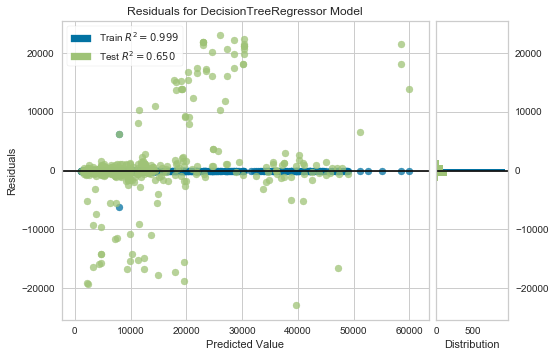

In [16]:
plot_model(dt)

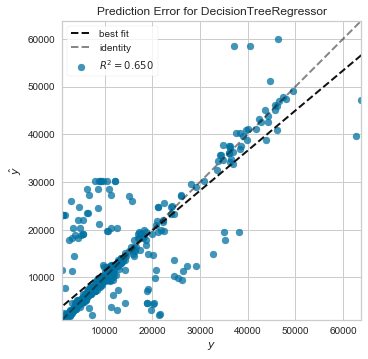

In [17]:
plot_model(dt, plot = 'error')

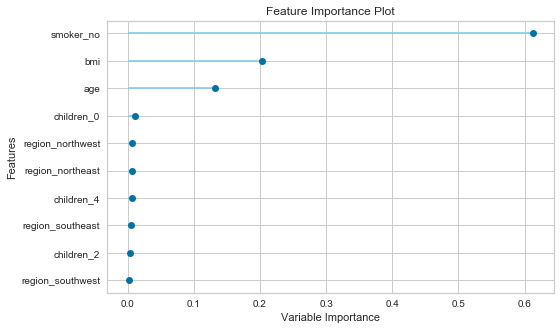

In [18]:
plot_model(dt, plot = 'feature')

In [19]:
evaluate_model(dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 10. Interpret Model

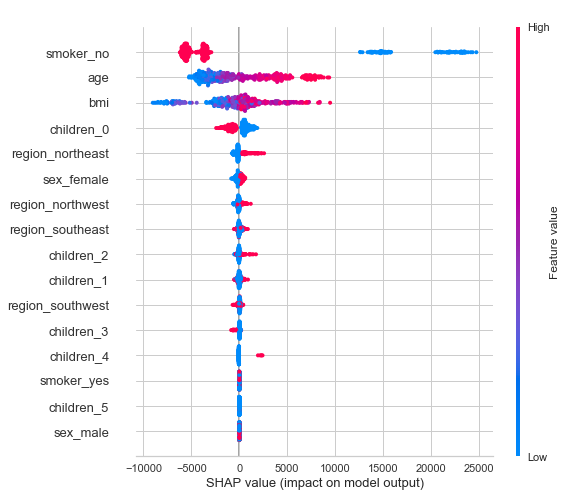

In [20]:
interpret_model(lightgbm)

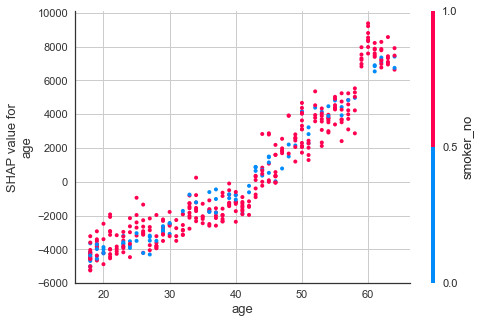

In [21]:
interpret_model(lightgbm, plot = 'correlation')

In [22]:
interpret_model(lightgbm, plot = 'reason', observation = 12)

# 11. AutoML()

In [23]:
best = automl(optimize = 'MAE')
best

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=123,
                                                       splitter='best'),
                

# 12. Predict Model

In [24]:
pred_holdouts = predict_model(lightgbm)
pred_holdouts.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,2764.0353,2.068683e+07,4548.2773,0.8552,0.5223,0.3678


,age,bmi,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges,Label
0,49.0,42.680,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,9800.88820,9363.9665
1,32.0,37.335,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4667.60765,10393.4936
2,27.0,31.400,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,34838.87300,35628.9933
3,35.0,24.130,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,5125.21570,6926.8267
4,60.0,25.740,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,12142.57860,17508.2783


In [25]:
new_data = data.copy()
new_data.drop(['charges'], axis=1, inplace=True)
predict_new = predict_model(best, data=new_data)
predict_new.head()

,age,sex,bmi,children,smoker,region,Label
0,19,female,27.900,0,yes,southwest,16884.9240
1,18,male,33.770,1,no,southeast,1725.5523
2,28,male,33.000,3,no,southeast,5138.2567
3,33,male,22.705,0,no,northwest,21984.4706
4,32,male,28.880,0,no,northwest,3866.8552


# 13. Save / Load Model

In [26]:
save_model(best, model_name='best-model')

Transformation Pipeline and Model Succesfully Saved


In [27]:
loaded_bestmodel = load_model('best-model')
print(loaded_bestmodel)

Transformation Pipeline and Model Sucessfully Loaded
[Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Levels...
                ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                ('P_transform', Empty()), ('pt_target', Empty()),
                ('binn', Empty()), ('rem_outliers', Empty()),
                ('cluster_all', Empty()), ('dummy', Dummify(t

In [28]:
from sklearn import set_config
set_config(display='diagram')
loaded_bestmodel[0]

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Levels...
                ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                ('P_transform', Empty()), ('pt_target', Empty()),
                ('binn', Empty()), ('rem_outliers', Empty()),
                ('cluster_all', Empty()), ('dummy', Dummify(target='charges')),
                ('fix_perfect', Empty()), ('clean_names', Clean_Colum_Names()),
                ('feature_select', Empty()), ('fix_multi', Empty()),
                ('dfs', Empty()), ('pca', Empty())],
         verbose=False)

In [29]:
from sklearn import set_config
set_config(display='text')

# 14. Deploy Model

In [30]:
deploy_model(best, model_name = 'best-aws', authentication = {'bucket' : 'pycaret-test'})

Model Succesfully Deployed on AWS S3


# 15. Get Config / Set Config

In [31]:
X_train = get_config('X_train')
X_train.head()

,age,bmi,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
300,36.0,27.55,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
904,60.0,35.10,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
670,30.0,31.57,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
617,49.0,25.60,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
373,26.0,32.90,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [32]:
get_config('seed')

123

In [33]:
from pycaret.regression import set_config
set_config('seed', 999)

In [34]:
get_config('seed')

999

# 16. MLFlow UI

In [ ]:
!mlflow ui

# End
Thank you. For more information / tutorials on PyCaret, please visit https://www.pycaret.org